handle no phone service and no internet service entries with no

In [120]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import joblib
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [121]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [122]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
df['customerID'].nunique()
df.drop(columns='customerID', inplace=True)


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [125]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [126]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [127]:
data_null = df[df['TotalCharges'].isnull()]
data_null[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No


all of the tenures are zero. meaning they still dont have to pay the bills yet, that is why the total charges are empty. 

In [128]:
df['TotalCharges'].fillna(0, inplace=True)

In [129]:
df_copy = df.copy()

In [130]:
df.shape
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [131]:
df.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [132]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# EDA

## Univariate Analysis


In [133]:
plt.style.use("ggplot")

[Text(0, 0, '5174')]

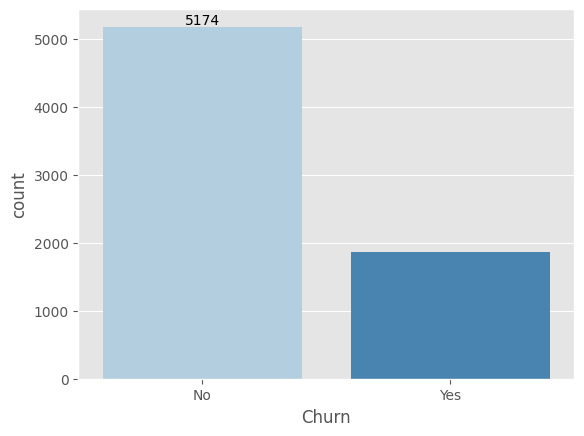

In [134]:
# Distribution of Churn
ax = sns.countplot(x = df["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])

## bivariate analysis

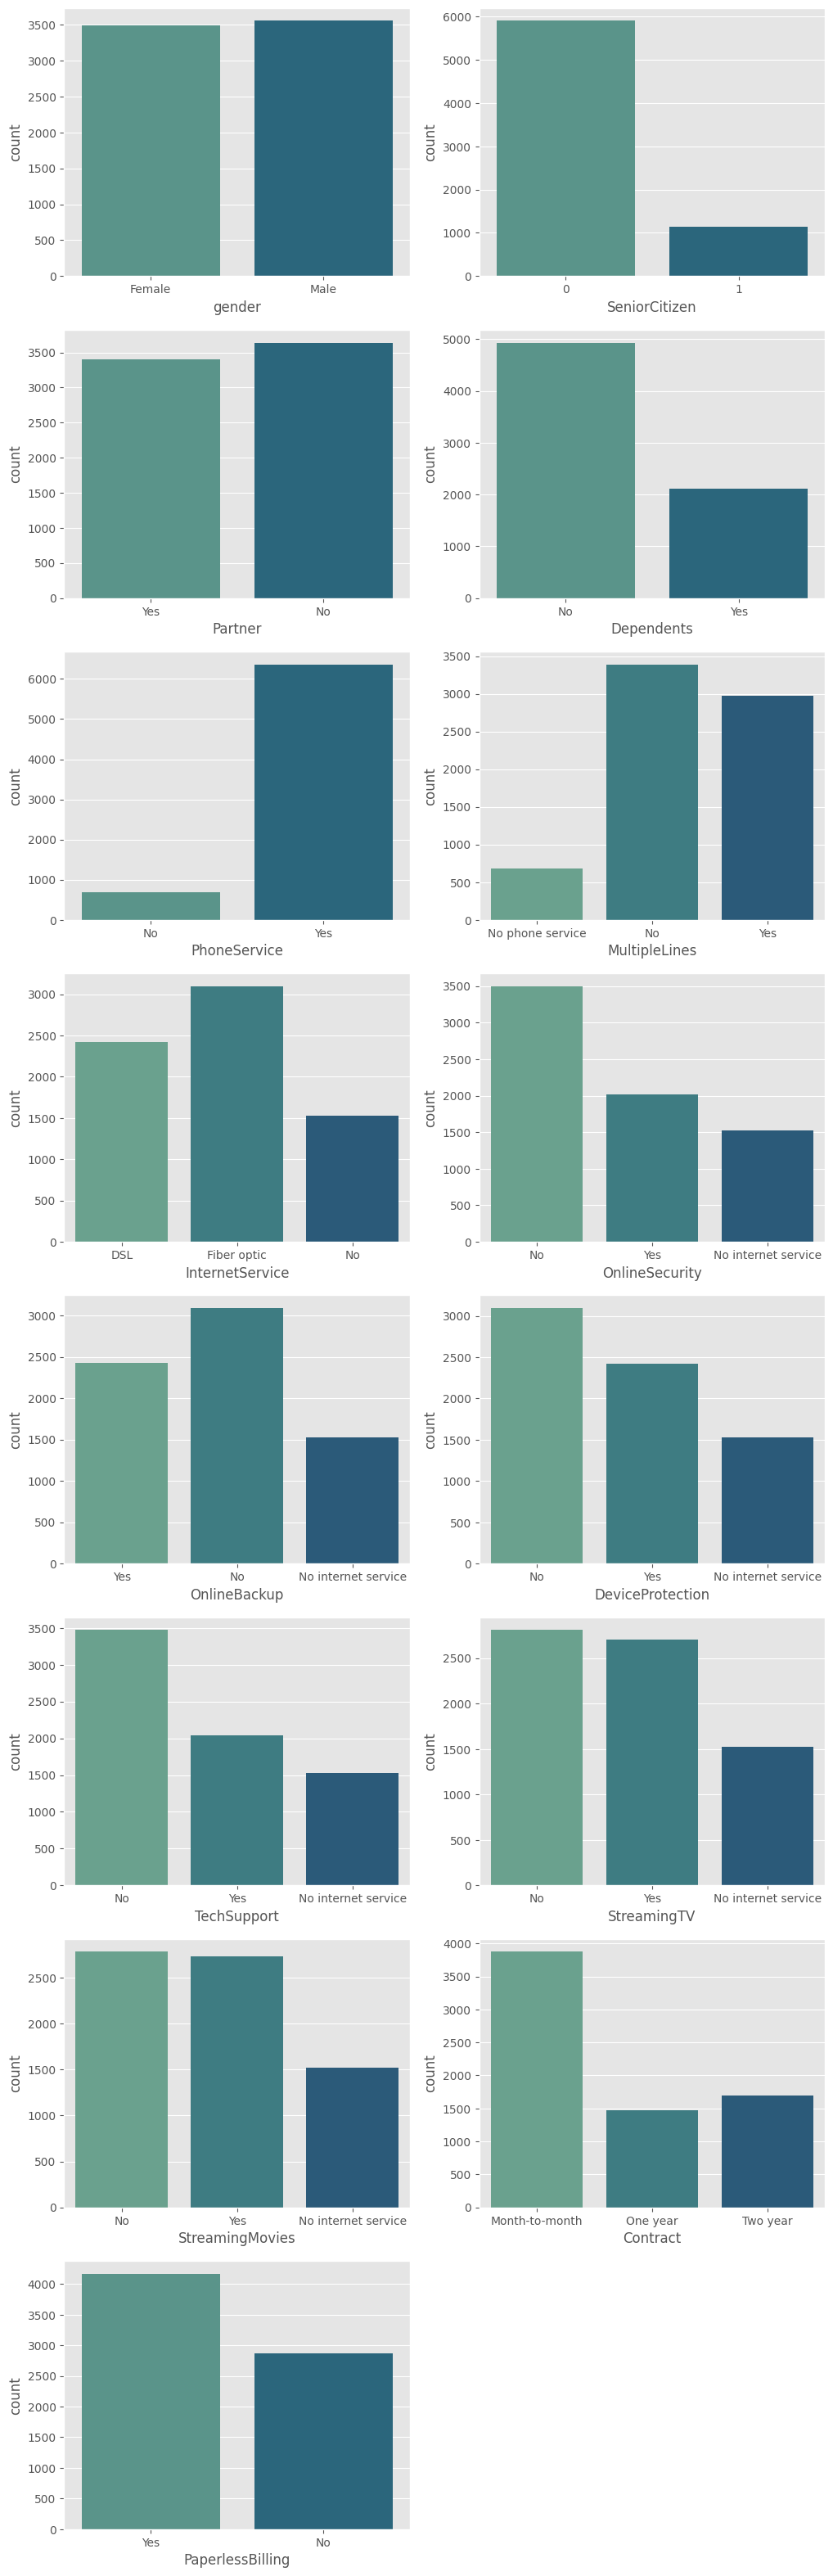

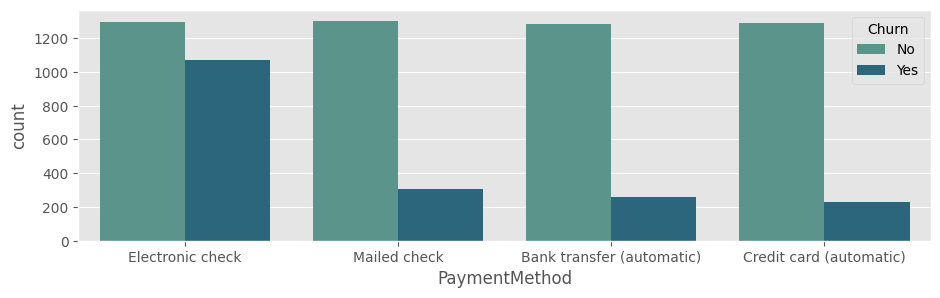

<Figure size 640x480 with 0 Axes>

In [135]:
#distribution of features(count)
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(12, 40))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(8, 2, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df, palette='crest')
plt.show() 
plt.tight_layout()

In [136]:
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

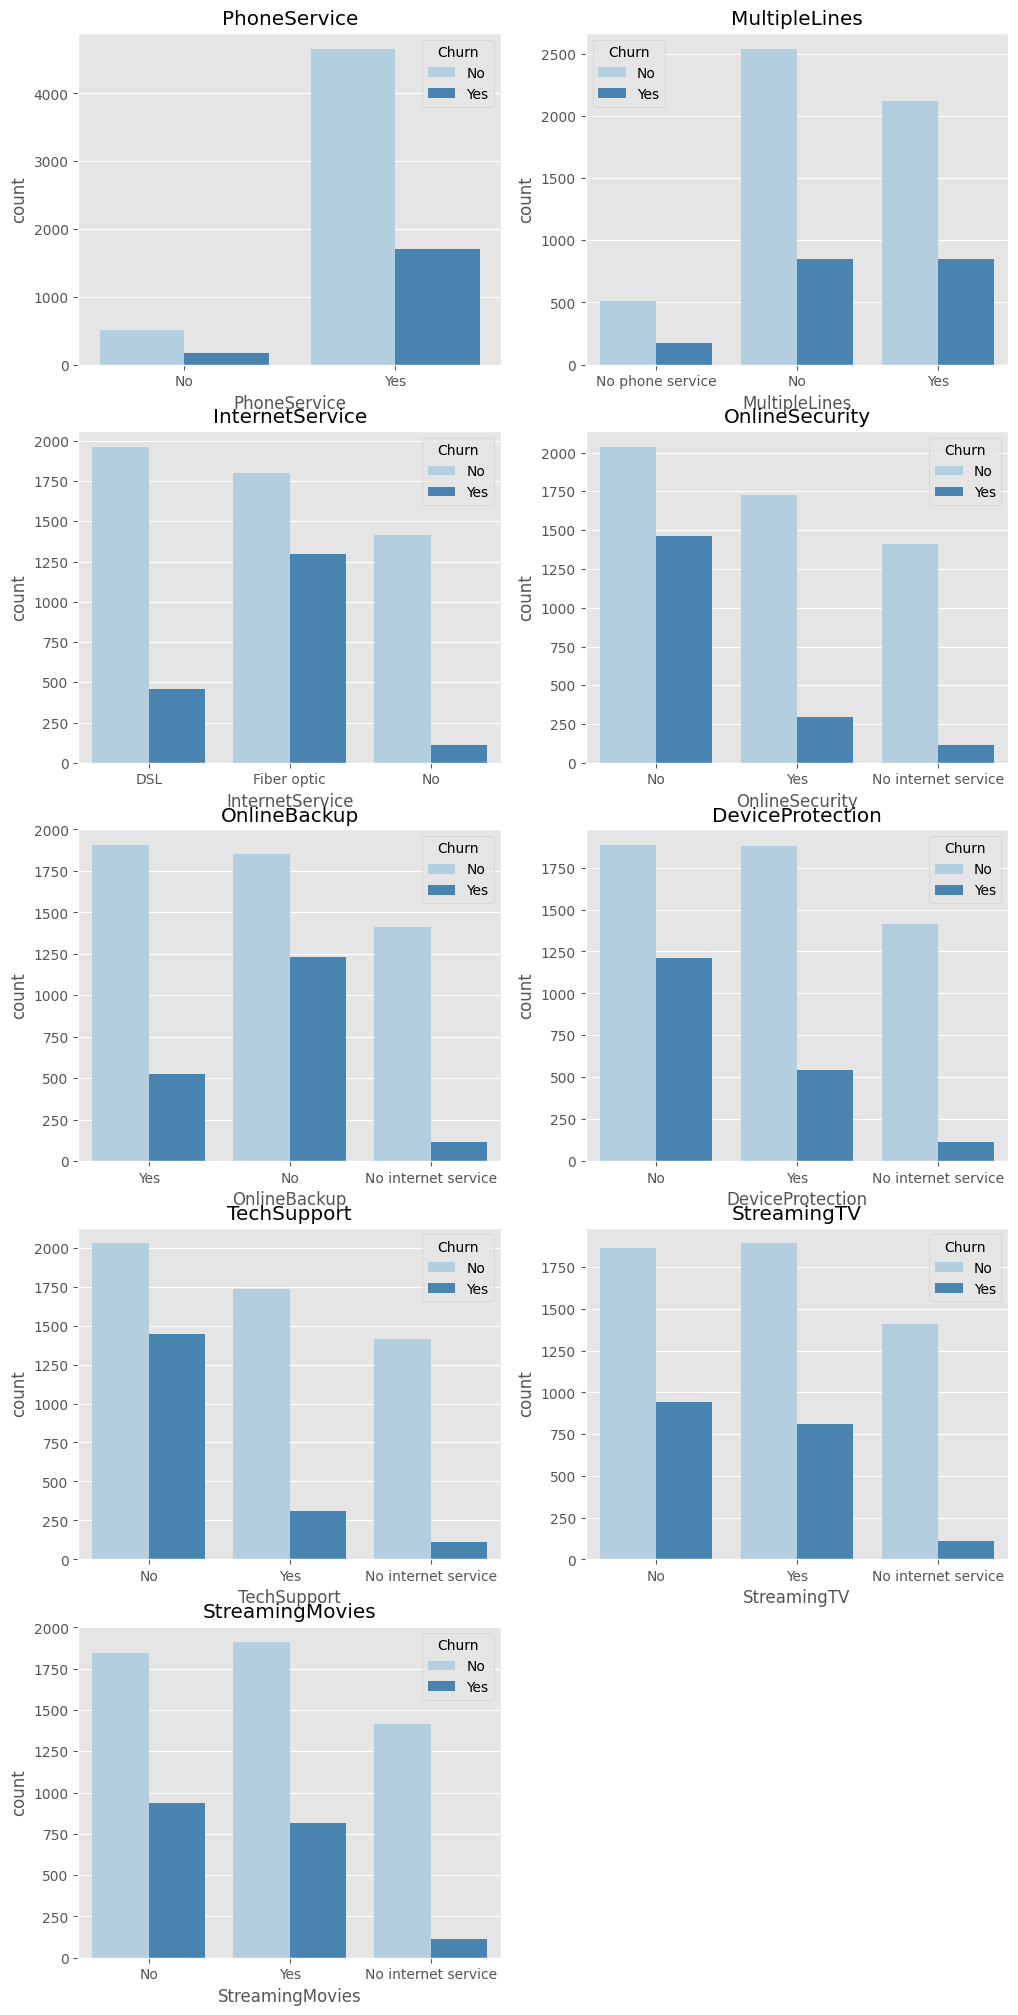

In [137]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services, "Churn")

The moderately higher churn rate for customers who has the phone service.
Customers with internet service fiber optic have a higher churn rate compared with DSL and No.
The much higher churn rate for customers without online security.
Customers who don’t have access to tech support tend to leave more frequently than those who do.
Customers without online backup and device protection have a higher churn rate.

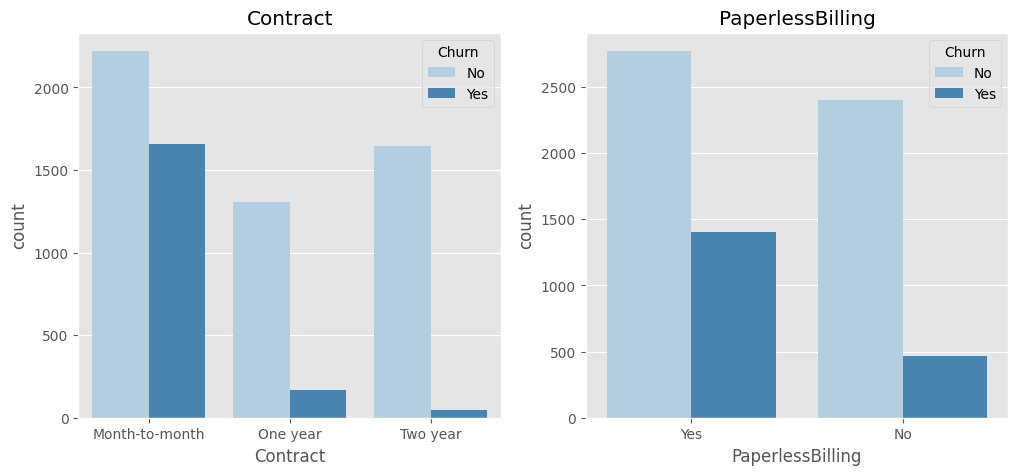

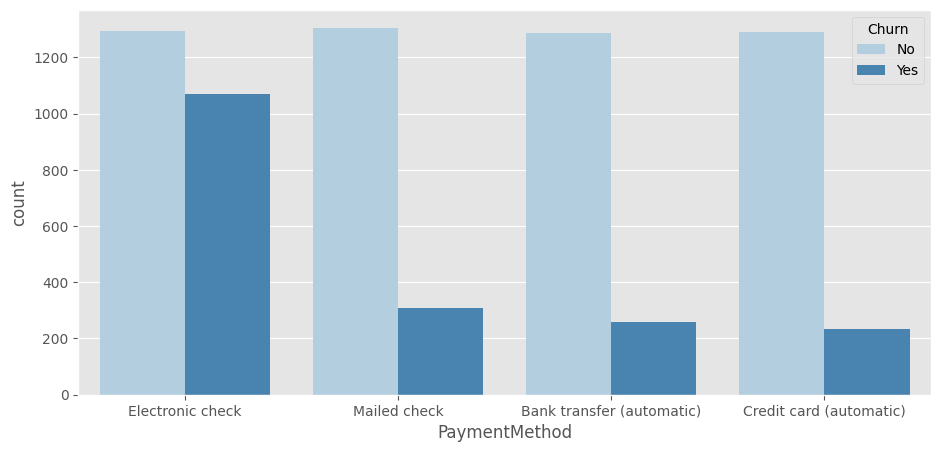

In [138]:
customer_account_cat = ["Contract","PaperlessBilling"]
plot_categorical_to_target(df,customer_account_cat,"Churn")
plt.figure(figsize=(11,5))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df, palette='Blues')
plt.show() 

Customers are more likely to churn with month-to-month contracts.
Moderately higher churn rate with electronic check payment method.
Customers with paperless billing have higher churn rates.

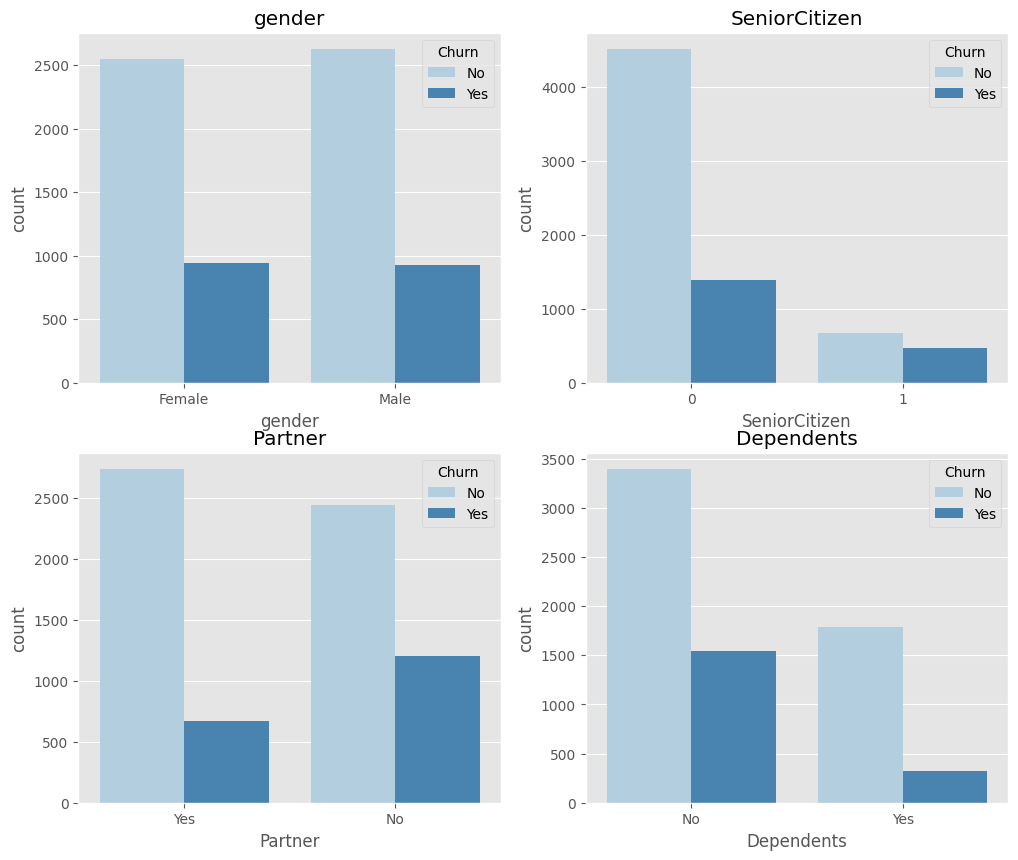

In [139]:
customer_demo = ["gender","SeniorCitizen","Partner","Dependents"]
plot_categorical_to_target(df,customer_demo, "Churn")

Churn and no churn no have differences for each gender.
Young customers are more likely to churn rather than old customers.
Customers with a partner are less than churn if compared with a partner.

In [140]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

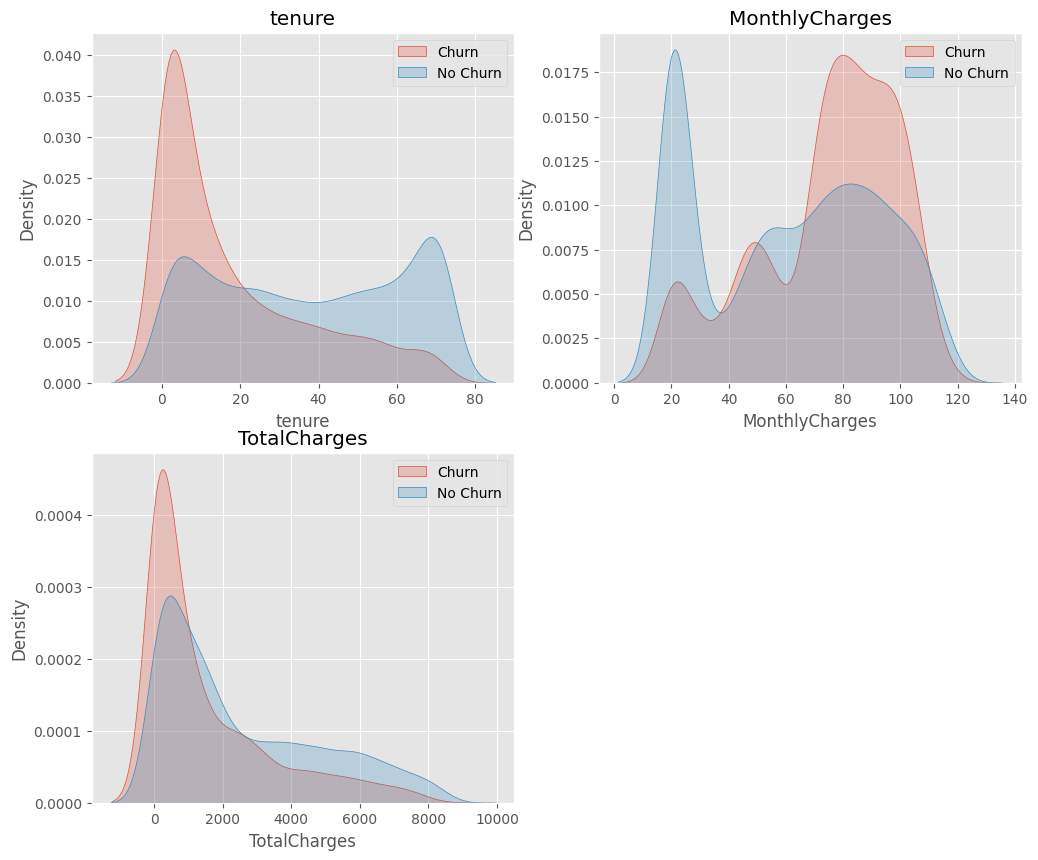

In [141]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

Customers with short tenure(only 0–2 months)are more churn.
Customers with paid more on monthly charges have higher churn rates.
Customers with small total charges tend to churn.

# Preprocessing

In [142]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-to-month' 'O

In [143]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [144]:
feature_le = ["Partner","Dependents","PhoneService","MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})


In [145]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [146]:
features_ohe = ["InternetService","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe).astype(int)

In [147]:
df_ohe

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [148]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

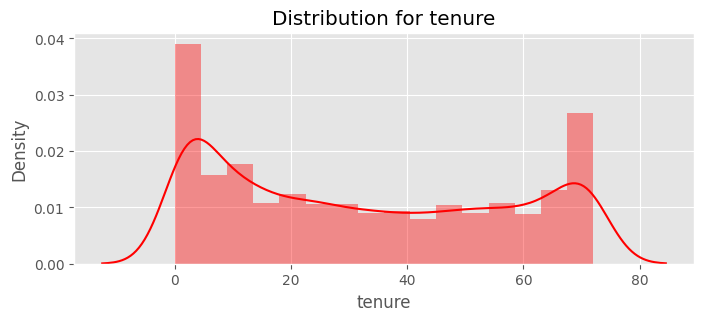

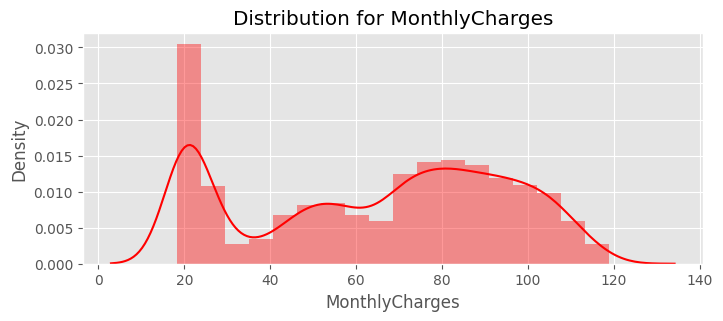

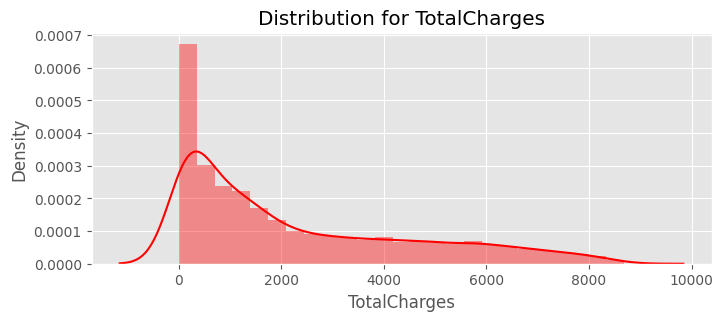

In [149]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use min max scalar to scale them down to the same range.

In [150]:
from sklearn.preprocessing import MinMaxScaler
df_mms = pd.DataFrame(df_ohe, columns=num_cols)
df_remaining = df_ohe.drop(columns=num_cols)
mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)
joblib.dump(mms,'mms.pkl')
rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=num_cols, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)


In [151]:
rescaled_feature_df

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.11,0.003339
1,0.472222,0.38,0.217526
2,0.027778,0.35,0.012437
3,0.625000,0.24,0.211884
4,0.027778,0.52,0.017388
...,...,...,...
7038,0.333333,0.66,0.229157
7039,1.000000,0.85,0.847766
7040,0.152778,0.11,0.039843
7041,0.055556,0.56,0.035237


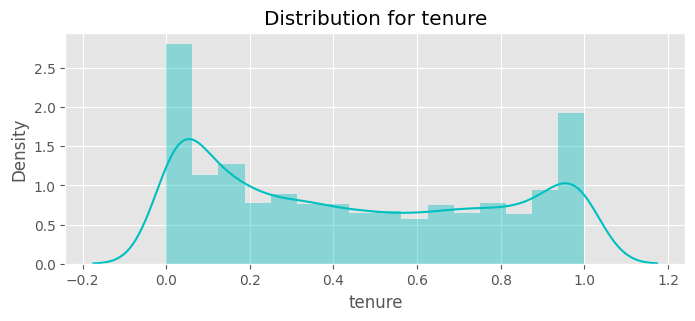

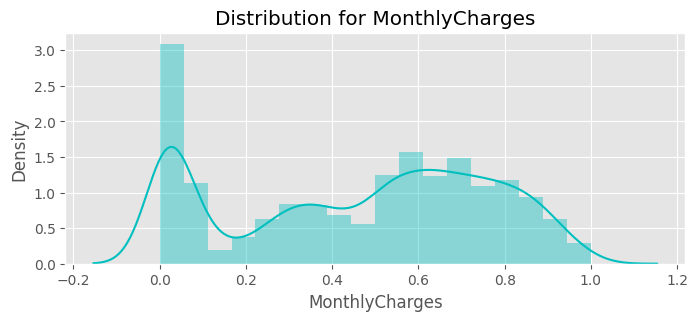

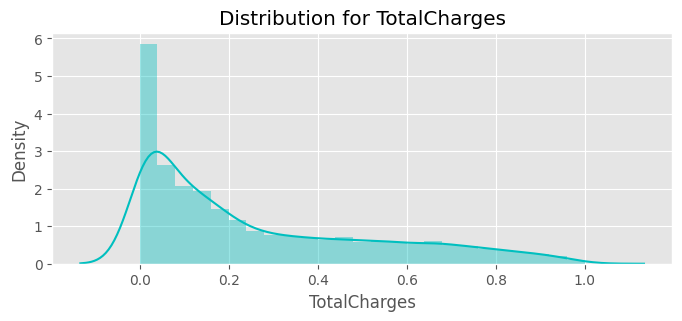

In [152]:
for feat in num_cols: distplot(feat, rescaled_feature_df, color='c')

In [153]:
df

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.11,0.003339,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0.472222,0.38,0.217526,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0.027778,0.35,0.012437,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0.625000,0.24,0.211884,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0.027778,0.52,0.017388,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.66,0.229157,0,0,1,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,1.000000,0.85,0.847766,1,0,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7040,0.152778,0.11,0.039843,1,0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
7041,0.055556,0.56,0.035237,0,1,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1


In [154]:
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

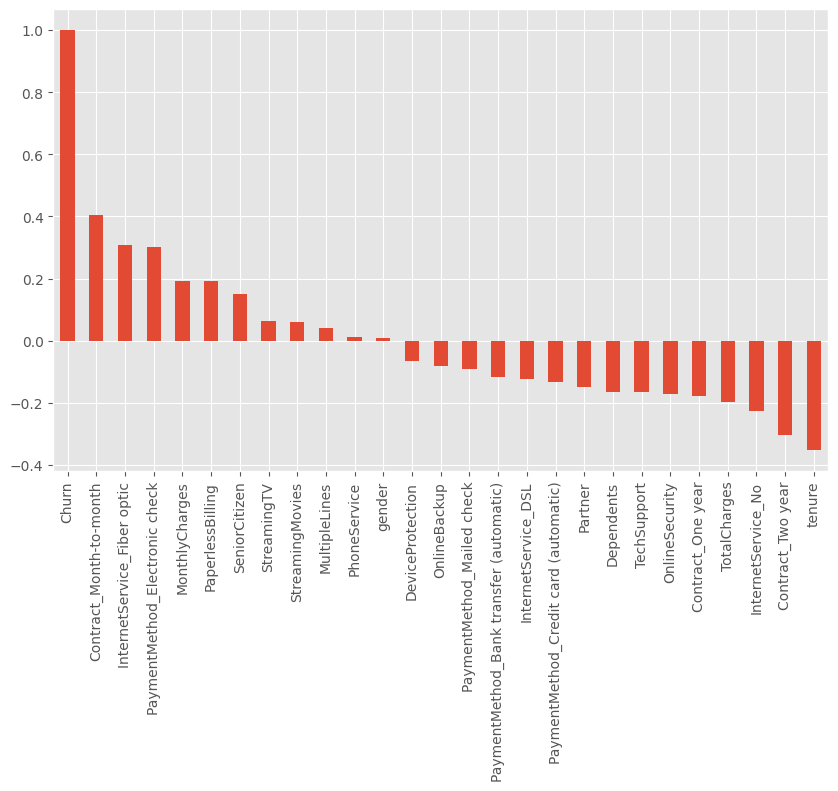

In [155]:
#correlation analysis
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

In [156]:
X = df.drop(columns = "Churn")
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 26), (1409, 26), (5634,), (1409,))

In [157]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [158]:
def modeling(alg, alg_name, params={}):
    # Instantiating the algorithm class and unpacking parameters if any
    #print(alg)
    model = alg(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    # Performance evaluation
    def print_scores(alg, y_true, y_pred, y_pred_proba):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("Accuracy: ", acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("Precision: ", pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("Recall: ", rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("F1 Score: ", f_score)
        roc_auc = roc_auc_score(y_true, y_pred_proba)
        print("ROC AUC Score: ", roc_auc)
        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        print("Confusion Matrix:\n", cm)
        
        # Plot Confusion Matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix for {alg_name}")
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
    #alg_name=alg_name.replace(' ','_')
    print_scores(alg, y_test, y_pred, y_pred_proba)
    return model

Logistic_Regression
Accuracy:  0.7991483321504613
Precision:  0.6417445482866043
Recall:  0.5508021390374331
F1 Score:  0.7939970572715149
ROC AUC Score:  0.8408147975922913
Confusion Matrix:
 [[920 115]
 [168 206]]


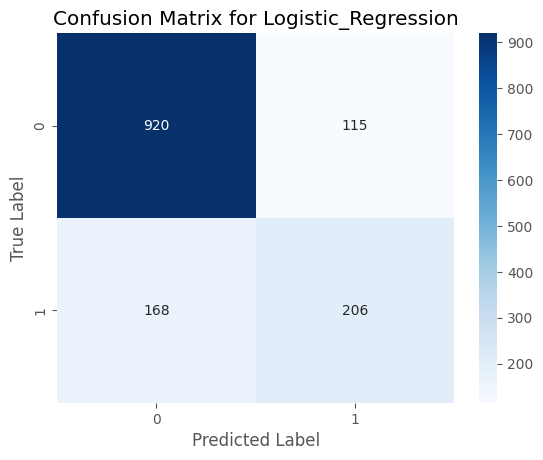

['LR1.pkl']

In [159]:
log_model = modeling(LogisticRegression, 'Logistic Regression')
joblib.dump(log_model,'LR1.pkl')


Random_Forest_Classification
Accuracy:  0.7885024840312278
Precision:  0.6301369863013698
Recall:  0.4919786096256685
F1 Score:  0.7795118267908694
ROC AUC Score:  0.8257265752150663
Confusion Matrix:
 [[927 108]
 [190 184]]


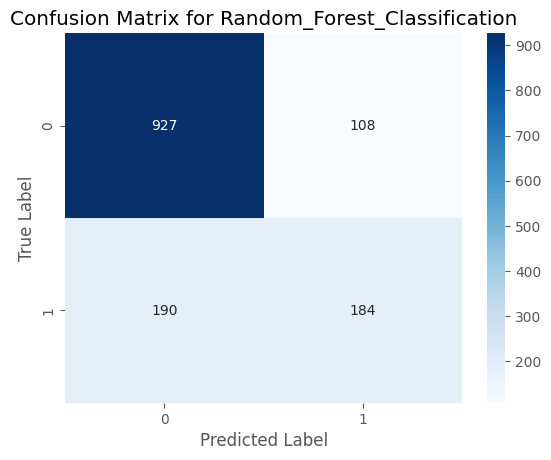

['RF1.pkl']

In [160]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")
joblib.dump(rf_model,'RF1.pkl')

Decision_Tree_Classification
Accuracy:  0.7267565649396736
Precision:  0.4854111405835544
Recall:  0.4893048128342246
F1 Score:  0.7271040342650814
ROC AUC Score:  0.6583494794492237
Confusion Matrix:
 [[841 194]
 [191 183]]


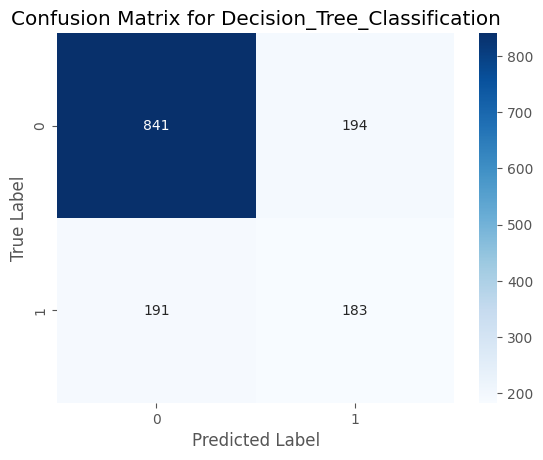

['DT1.pkl']

In [161]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")
joblib.dump(dt_model,'DT1.pkl')

Naive_Bayes_Classification
Accuracy:  0.7395315826827538
Precision:  0.5062611806797853
Recall:  0.7566844919786097
F1 Score:  0.7525734793220177
ROC AUC Score:  0.8229533183497378
Confusion Matrix:
 [[759 276]
 [ 91 283]]


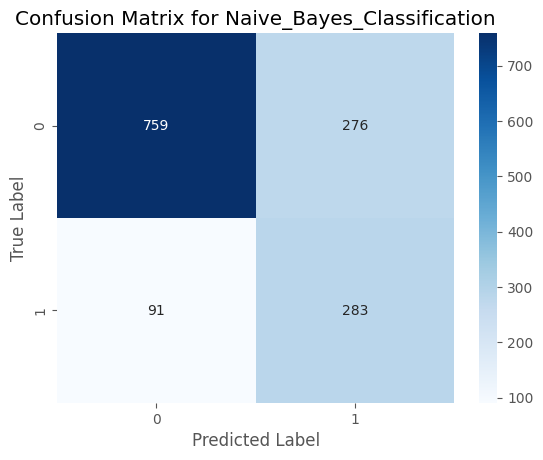

['NB1.pkl']

In [162]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")
joblib.dump(nb_model,'NB1.pkl')

SVC_Classification
Accuracy:  0.7885024840312278
Precision:  0.6283783783783784
Recall:  0.49732620320855614
F1 Score:  0.7800314732919966
ROC AUC Score:  0.8038531090960759
Confusion Matrix:
 [[925 110]
 [188 186]]


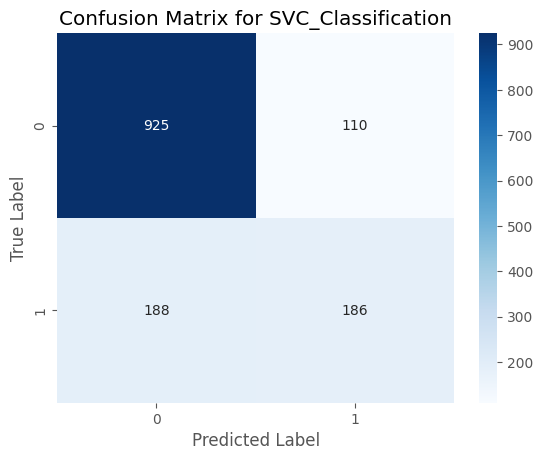

['SVC1.pkl']

In [163]:
svc_model = modeling(SVC, 'SVC Classification', params={'probability': True})
joblib.dump(svc_model,'SVC1.pkl')

KNN_classifier
Accuracy:  0.7572746628814763
Precision:  0.5434782608695652
Recall:  0.5347593582887701
F1 Score:  0.7566440527516207
ROC AUC Score:  0.7789519233253248
Confusion Matrix:
 [[867 168]
 [174 200]]


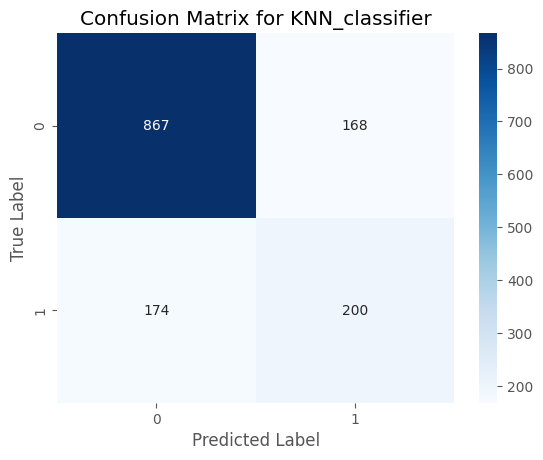

['KNN1.pkl']

In [164]:
knn_model = modeling(KNeighborsClassifier, "KNN classifier")
joblib.dump(knn_model,'KNN1.pkl')

## resampling to handle the imbalanced data and modeling

In [165]:
value = df['Churn'].value_counts()
print(value)

Churn
0    5174
1    1869
Name: count, dtype: int64


In [166]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()  #Synthetic Minority Over-Sampling  Technique


In [167]:
X1, y1 = oversample.fit_resample(X,y)

In [168]:
value = y1.value_counts()
print(value)

Churn
0    5174
1    5174
Name: count, dtype: int64


In [169]:
X1.shape, y1.shape

((10348, 26), (10348,))

In [170]:
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.33, random_state=0)

Logistic_Regression
Accuracy:  0.8061493411420205
Precision:  0.7837259100642399
Recall:  0.8501742160278746
F1 Score:  0.8057235283274617
ROC AUC Score:  0.88919582787086
Confusion Matrix:
 [[1289  404]
 [ 258 1464]]


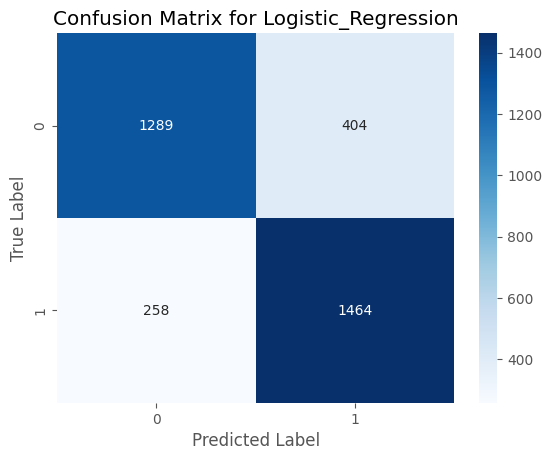

['LR2.pkl']

In [171]:
log_model = modeling(LogisticRegression, 'Logistic Regression')
joblib.dump(log_model,'LR2.pkl')

Random_Forest_Classification
Accuracy:  0.8310395314787701
Precision:  0.807961269499731
Recall:  0.8722415795586528
F1 Score:  0.8307092686259885
ROC AUC Score:  0.9121539947573976
Confusion Matrix:
 [[1336  357]
 [ 220 1502]]


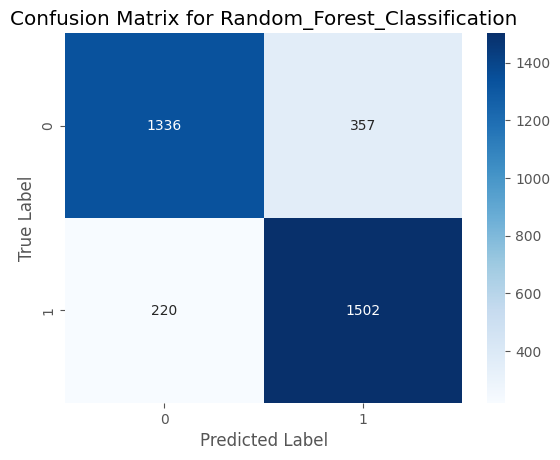

['RF2.pkl']

In [172]:
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")
joblib.dump(rf_model,'RF2.pkl')

Decision_Tree_Classification
Accuracy:  0.7710102489019034
Precision:  0.764341957255343
Recall:  0.789198606271777
F1 Score:  0.7709167275621156
ROC AUC Score:  0.7720114524999776
Confusion Matrix:
 [[1274  419]
 [ 363 1359]]


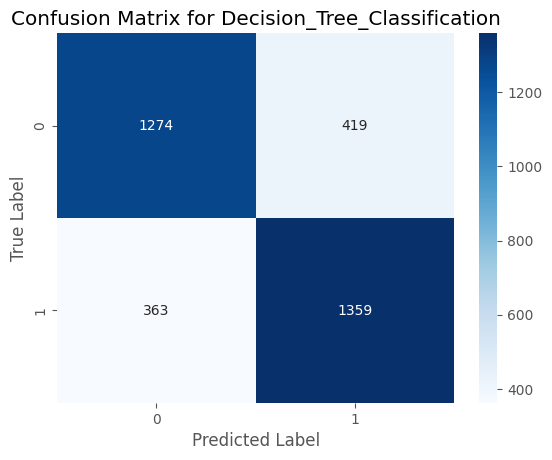

['DT2.pkl']

In [173]:
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")
joblib.dump(dt_model,'DT2.pkl')

Naive_Bayes_Classification
Accuracy:  0.7654465592972182
Precision:  0.7422409258285113
Recall:  0.8193960511033682
F1 Score:  0.7646949521867161
ROC AUC Score:  0.8491021305875871
Confusion Matrix:
 [[1203  490]
 [ 311 1411]]


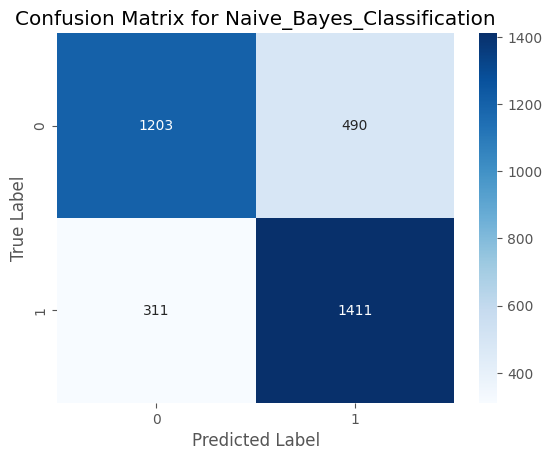

['NB2.pkl']

In [174]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")
joblib.dump(nb_model,'NB2.pkl')

SVC_Classification
Accuracy:  0.8005856515373353
Precision:  0.7715179968701096
Recall:  0.8588850174216028
F1 Score:  0.7998355325238132
ROC AUC Score:  0.884156803343411
Confusion Matrix:
 [[1255  438]
 [ 243 1479]]


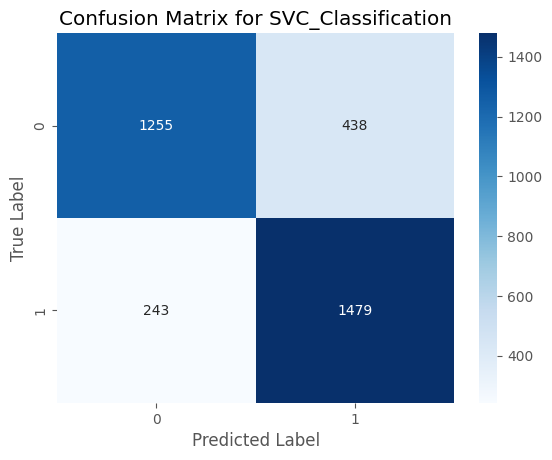

['SVC2.pkl']

In [175]:
svc_model = modeling(SVC, 'SVC Classification', params={'probability': True})
joblib.dump(svc_model,'SVC2.pkl')

KNN_classifier
Accuracy:  0.7950219619326501
Precision:  0.747577519379845
Recall:  0.8960511033681765
F1 Score:  0.7927652190058719
ROC AUC Score:  0.8594515024974737
Confusion Matrix:
 [[1172  521]
 [ 179 1543]]


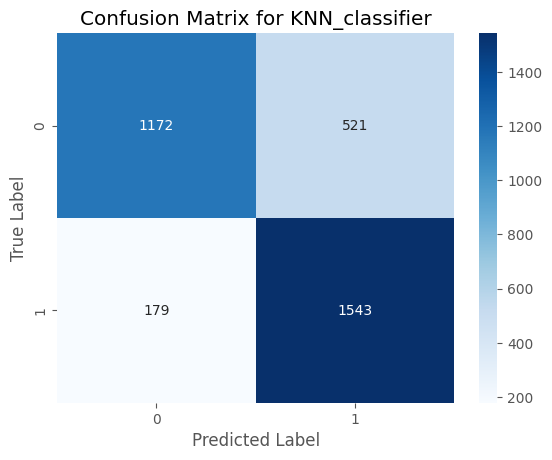

['KNN2.pkl']

In [176]:
knn_model = modeling(KNeighborsClassifier, "KNN classifier")
joblib.dump(knn_model,'KNN2.pkl')